In [133]:
import pandas as pd
import numpy as np
import pandasql as ps
import time 
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

### Extract ENGAGED Data

#### Engaged Daily Merged v12.xlsx
Key Variables for EDA:  
weight_goal_lbs, total_calories, total_fat, active_minutes(shimmer data), pa_manual(self-report), Activity_total(sum)

In [134]:
df_raw = pd.read_excel('Raw Data/Engaged Daily Merged v12.xlsx')

In [135]:
df_raw.head(5)

,ID,Tech_id,date,NUBIC,age,gender,Study_Day,Study_Day2,Day_o_week,Month,...,pa_manual,Activity_total,adh_cal,adh_fat,adh_sum,adh_diet_days,filter_$,weightminusfood,weight_time,food_time
0,102,14,2011-09-14,66,56,1,1,1,4,9,...,0.0,0.0,1.0,1.0,2.0,1.0,1,NaN,NaN,NaN
1,102,14,2011-09-15,66,56,1,2,2,5,9,...,45.0,56.0,1.0,1.0,2.0,1.0,0,NaN,NaN,NaN
2,102,14,2011-09-16,66,56,1,3,3,6,9,...,0.0,0.0,1.0,1.0,2.0,1.0,0,NaN,NaN,NaN
3,102,14,2011-09-17,66,56,1,4,4,7,9,...,0.0,0.0,1.0,1.0,2.0,1.0,0,NaN,NaN,NaN
4,102,14,2011-09-18,66,56,1,5,5,1,9,...,20.0,20.0,1.0,1.0,2.0,1.0,0,NaN,NaN,NaN


In [136]:
#divide by gender
df_female = df_raw[df_raw['gender']==1]
df_male = df_raw[df_raw['gender']==2]

In [137]:
#eight_goal_lbs, total_calories, total_fat, active_minutes(shimmer data), pa_manual(self-report), Activity_total(sum)

female_weight = list(df_female['weight_goal_lbs'])
male_weight = list(df_male['weight_goal_lbs'])

female_cal = list(df_female['total_calories'])
male_cal = list(df_male['total_calories'])

female_fat = list(df_female['total_fat'])
male_fat = list(df_male['total_fat'])

pa_shimmer = list(df_raw['active_minutes'])
pa_report = list(df_raw['pa_manual'])
pa_all = list(df_raw['Activity_total'])


#clean up missing values 
female_weight = [i for i in female_weight if str(i) != 'nan']
male_weight = [i for i in male_weight  if str(i) != 'nan']
female_cal = [i for i in female_cal if str(i) != 'nan']
male_cal = [i for i in male_cal  if str(i) != 'nan']
female_fat = [i for i in female_fat if str(i) != 'nan']
male_fat = [i for i in male_fat  if str(i) != 'nan']
pa_shimmer = [i for i in pa_shimmer  if str(i) != 'nan']
pa_report = [i for i in pa_report if str(i) != 'nan']
pa_all = [i for i in pa_all  if str(i) != 'nan']

In [138]:
#get Stats
def Stats(l, IQR_range):
    for i in range(0, len(l)): 
        l[i] = float(l[i])
    Max = np.max(l)
    Min = np.min(l)
    Mean = np.mean(l)
    Median = np.median(l)
    STD = np.std(l)
    
    #outlier percentage
    q1 = np.percentile(l, 25)  
    q3 = np.percentile(l, 75)
    IQR = q3-q1
    low = q1 - IQR_range*IQR
    high = q3 + IQR_range*IQR

    outliersPercent = len([i for i in l if i < low or i > high]) / len(l) * 100
    return([Min, Max, Mean, Median, STD, IQR_range, low, high, outliersPercent])

In [139]:
weight_female_stats1 = ['Weight (Female)'] + Stats(female_weight, 1.5) 
weight_female_stats2 = ['Weight (Female)'] + Stats(female_weight, 3.0) 
weight_male_stats1 = ['Weight (Male)'] + Stats(male_weight, 1.5) 
weight_male_stats2 = ['Weight (Male)'] + Stats(male_weight, 3.0) 

cal_female_stats1 = ['Calories (Female)'] + Stats(female_cal, 1.5) 
cal_female_stats2 = ['Calories (Female)'] + Stats(female_cal, 3.0) 
cal_male_stats1 = ['Calories (Male)'] + Stats(male_cal, 1.5) 
cal_male_stats2 = ['Calories (Male)'] + Stats(male_cal, 3.0) 

fat_female_stats1 = ['Fat (Female)'] + Stats(female_fat,1.5) 
fat_female_stats2 = ['Fat (Female)'] + Stats(female_fat,3.0) 
fat_male_stats1 = ['Fat (Male)'] + Stats(male_fat,1.5) 
fat_male_stats2 = ['Fat (Male)'] + Stats(male_fat,3.0) 

allList = [weight_female_stats1, weight_female_stats2, weight_male_stats1, weight_male_stats2, cal_female_stats1, cal_female_stats2, cal_male_stats1, cal_male_stats2, fat_female_stats1, fat_female_stats2, fat_male_stats1, fat_male_stats2]
pd.DataFrame(allList, columns=['Outcome', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'IQR', 'Low-Cutoff', 'High-Cutoff', 'Outlier Percentage'])

,Outcome,Min,Max,Mean,Median,Standard Deviation,IQR,Low-Cutoff,High-Cutoff,Outlier Percentage
0,Weight (Female),132.000000,222.000000,190.701581,196.000000,21.453896,1.5,121.000000,257.000000,0.000000
1,Weight (Female),132.000000,222.000000,190.701581,196.000000,21.453896,3.0,70.000000,308.000000,0.000000
2,Weight (Male),167.000000,226.000000,200.573850,215.000000,27.527622,1.5,78.500000,314.500000,0.000000
3,Weight (Male),167.000000,226.000000,200.573850,215.000000,27.527622,3.0,-10.000000,403.000000,0.000000
4,Calories (Female),4.000000,3164.748000,1114.152668,1160.000000,398.107540,1.5,161.707161,2127.180749,1.607717
5,Calories (Female),4.000000,3164.748000,1114.152668,1160.000000,398.107540,3.0,-575.345435,2864.233344,0.049468
6,Calories (Male),53.119999,3333.401454,1137.013097,1163.763245,497.428868,1.5,-115.661377,2385.605625,0.757576
7,Calories (Male),53.119999,3333.401454,1137.013097,1163.763245,497.428868,3.0,-1053.636503,3323.580750,0.252525
8,Fat (Female),0.000000,327.250000,32.887251,32.596730,16.415680,1.5,-2.647756,67.678926,2.102399
9,Fat (Female),0.000000,327.250000,32.887251,32.596730,16.415680,3.0,-29.020261,94.051431,0.321543


In [141]:
shimmer_stats1 = ['Shimmer Minutes'] + Stats(pa_shimmer, 1.5) 
shimmer_stats2 = ['Shimmer Minutes'] + Stats(pa_shimmer, 3.0) 


self_stats1 = ['Self-report Minutes'] + Stats(pa_report, 1.5) 
self_stats2 = ['Self-report Minutes'] + Stats(pa_report, 3.0) 


all_stats1 = ['Total Minutes'] + Stats(pa_all, 1.5) 
all_stats2 = ['Total Minutes'] + Stats(pa_all, 3.0) 


allList = [shimmer_stats1, shimmer_stats2, self_stats1, self_stats2, all_stats1, all_stats2]
pd.DataFrame(allList, columns=['Outcome', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'IQR', 'Low-Cutoff', 'High-Cutoff', 'Outlier Percentage'])

,Outcome,Min,Max,Mean,Median,Standard Deviation,IQR,Low-Cutoff,High-Cutoff,Outlier Percentage
0,Shimmer Minutes,0.0,134.0,12.515082,0.0,19.916218,1.5,-30.0,50.0,6.346879
1,Shimmer Minutes,0.0,134.0,12.515082,0.0,19.916218,3.0,-60.0,80.0,1.110180
2,Self-report Minutes,0.0,210.0,8.736270,0.0,19.611418,1.5,0.0,0.0,23.688525
3,Self-report Minutes,0.0,210.0,8.736270,0.0,19.611418,3.0,0.0,0.0,23.688525
4,Total Minutes,0.0,240.0,21.297444,10.0,27.243074,1.5,-52.5,87.5,2.953498
5,Total Minutes,0.0,240.0,21.297444,10.0,27.243074,3.0,-105.0,140.0,0.209468


In [149]:
#PA self-report removed 0
pa_report_valid = [i for i in pa_report if i != 0]

self_stats1 = ['Self-report Minutes (0 removed)'] + Stats(pa_report_valid, 1.5) 
self_stats2 = ['Self-report Minutes (0 removed)'] + Stats(pa_report_valid, 3.0) 
allList = [self_stats1, self_stats2]
pd.DataFrame(allList, columns=['Outcome', 'Min', 'Max', 'Mean', 'Median', 'Standard Deviation', 'IQR', 'Low-Cutoff', 'High-Cutoff', 'Outlier Percentage'])

,Outcome,Min,Max,Mean,Median,Standard Deviation,IQR,Low-Cutoff,High-Cutoff,Outlier Percentage
0,Self-report Minutes (0 removed),8.0,210.0,36.879758,30.0,24.200794,1.5,-25.0,95.0,1.903114
1,Self-report Minutes (0 removed),8.0,210.0,36.879758,30.0,24.200794,3.0,-70.0,140.0,0.865052


### Distribution and Boxplot

In [146]:
high_shimmer_1 = Stats(pa_shimmer, 1.5)[-2]
high_shimmer_2 = Stats(pa_shimmer, 3.0)[-2]
high_self_1 = Stats(pa_report, 1.5)[-2]
high_self_2 = Stats(pa_report, 3.0)[-2]
high_all_1 = Stats(pa_all, 1.5)[-2]
high_all_2 = Stats(pa_all, 3.0)[-2]
high_self_valid_1 = Stats(pa_report_valid, 1.5)[-2]
high_self_valid_2 = Stats(pa_report_valid, 3.0)[-2]


high_weight_f_1 = Stats(female_weight, 1.5)[-2]
high_weight_f_2 = Stats(female_weight, 3.0)[-2]
high_weight_m_1 = Stats(male_weight, 1.5)[-2]
high_weight_m_2 = Stats(male_weight, 3.0)[-2]

high_cal_f_1 = Stats(female_cal, 1.5)[-2]
high_cal_f_2 = Stats(female_cal, 3.0)[-2]
high_cal_m_1 = Stats(male_cal, 1.5)[-2]
high_cal_m_2 = Stats(male_cal, 3.0)[-2]

high_fat_f_1 = Stats(female_fat, 1.5)[-2]
high_fat_f_2 = Stats(female_fat, 3.0)[-2]
high_fat_m_1 = Stats(male_fat, 1.5)[-2]
high_fat_m_2 = Stats(male_fat, 3.0)[-2]

Text(140.0, 0.006, 'IQR=3.0')

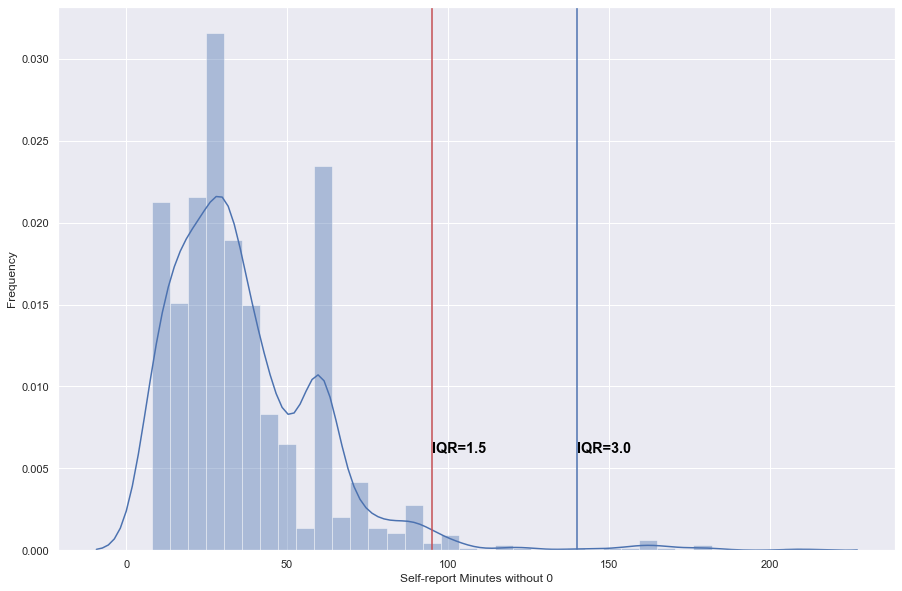

In [147]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.distplot(pa_report_valid)
ax.set(xlabel='Self-report Minutes without 0', ylabel='Frequency')

plt.axvline(high_self_valid_1, 0, 1,color='r')
ax.text(high_self_valid_1, 0.006, "IQR=1.5", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.axvline(high_self_valid_2, 0, 1,color='b')
ax.text(high_self_valid_2, 0.006, "IQR=3.0", horizontalalignment='left', size='large', color='black', weight='semibold')

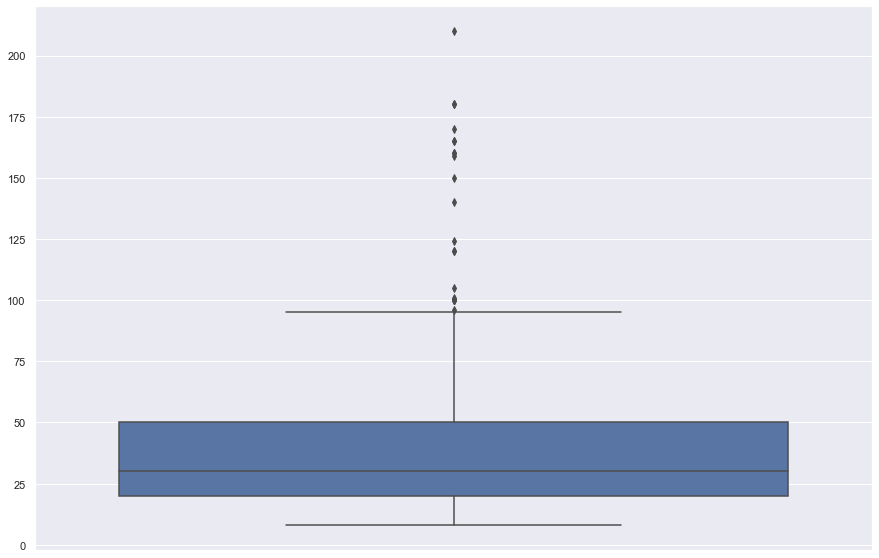

In [148]:
sns.boxplot(pa_report_valid, orient = 'v')

## Shimmer (s2_counts table)

In [98]:
df_counts = pd.read_csv('Raw Data/s2_counts.csv')
df_counts.head(5)

,_id,user_id,uc_id,tstamp,pa_count,tstamp_server_uploaded
0,1,2,17,2011-09-12 19:40:33,1562,2011-09-12 19:40:34
1,2,3,1,2011-09-12 19:41:24,515,2011-09-12 19:41:54
2,3,8,1,2011-09-12 19:41:39,280,2011-09-12 19:42:02
3,4,3,2,2011-09-12 19:42:23,52,2011-09-12 19:42:54
4,5,8,2,2011-09-12 19:42:37,59,2011-09-12 19:43:02


In [105]:
def shimmer(df_pa_device, cutoff):
    #get day-level date
    df_pa_device['upload_time'] = df_pa_device['tstamp'].astype('string').str[:10]
    
    #active minute
    df_pa_device_active = df_pa_device[df_pa_device['pa_count'] >= 1900]
    if (cutoff != 0):
        df_pa_device_active = df_pa_device_active[df_pa_device_active['pa_count'] < cutoff]
    
    #group by user and each day, count total physical activity minutes per day
    df_pa_device_count = ps.sqldf("select user_id, upload_time, count(pa_count) as pa_minute_shimmer from df_pa_device_active group by user_id, upload_time")
    
    return(df_pa_device_count)

In [124]:
df_all_shimmer = shimmer(df_counts, 0)
df_16000 = shimmer(df_counts, 16000)
df_20000 = shimmer(df_counts, 20000)

In [125]:
df_copy = df_raw
df_copy['date'] = pd.to_datetime(df_copy.date)
df_all_shimmer['upload_time'] = pd.to_datetime(df_all_shimmer.upload_time)
df_16000['upload_time'] = pd.to_datetime(df_16000.upload_time)
df_20000['upload_time'] = pd.to_datetime(df_20000.upload_time)

#rename the key index
df_all_shimmer.rename(columns={'user_id':'Tech_id', 'upload_time':'date', 'pa_minute_shimmer':'shimmer_no_cutoff'}, inplace=True)
df_16000.rename(columns={'user_id':'Tech_id', 'upload_time':'date','pa_minute_shimmer':'shimmer_16k_cutoff'}, inplace=True)
df_20000.rename(columns={'user_id':'Tech_id', 'upload_time':'date','pa_minute_shimmer':'shimmer_20k_cutoff'}, inplace=True)

In [129]:
df_copy2 = pd.merge(df_copy, df_all_shimmer, how='outer', on=['Tech_id', 'date'])
df_copy3 = pd.merge(df_copy2, df_16000, how='outer', on=['Tech_id', 'date'])
df_copy4 = pd.merge(df_copy3, df_20000, how='outer', on=['Tech_id', 'date'])

In [132]:
shimmer_report = df_copy4[['ID', 'date','active_minutes','shimmer_no_cutoff','shimmer_16k_cutoff','shimmer_20k_cutoff']]
shimmer_report.to_csv('shimmer_min_compare.csv', index=False)